Clustering - задача разбиения набора данных на группы, называемые *кластерами*. Точки, находящиеся в разных кластерах, должны отличаться друг от друга.

# k-means
*Метод k-средних*:  
Пусть имеется набор точек из пространства $R^n$. Известно число кластеров $k$.  
1) генерируется k случайных точек из исходного пространства ($R^n$). Эти точки будут первоначальными *центрами тяжести кластеров*;  
2) для каждой точки считается ее расстояние (Евклидова метрика) до каждого центра. Чей центр расположен ближе - к тому кластеру относится точка;  
3) Происходит пересчет центров тяжести кластеров. Они сдвигаются;  
4) Возвращение на шаг 2. Цикл повторяется до тех пор, *пока центры кластеров не стабилизируются* (пока не перестанет меняться принадлежность объекта к кластеру)
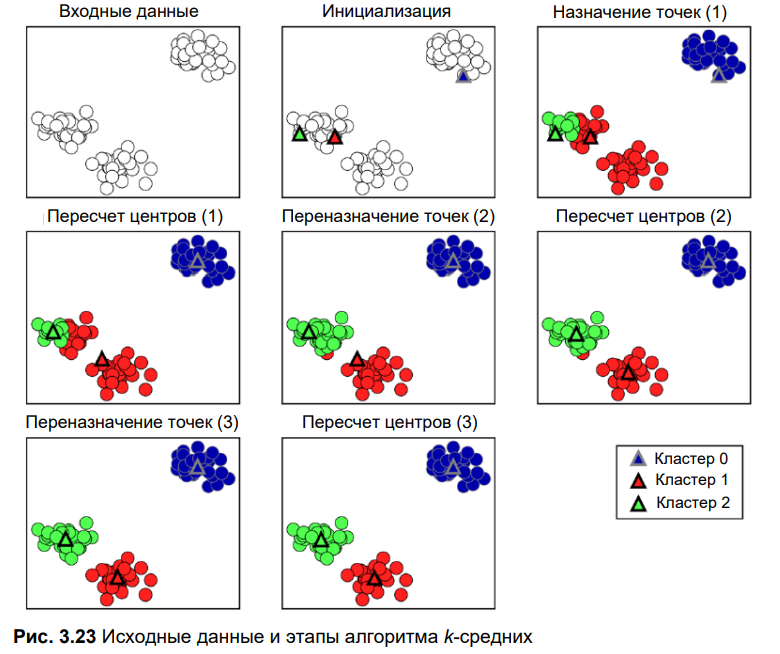

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# синтетические двумерные данные (5 кластеров)
X, y = make_blobs(n_samples=(10, 20, 16, 29, 7),
                  random_state=19)
print(f'Размер синтетических данных: {X.shape}')
print(f'Количество кластеров(классов): {len(np.unique(y))}')

Размер синтетических данных: (82, 2)
Количество кластеров(классов): 5


Text(0, 0.5, 'Второй признак')

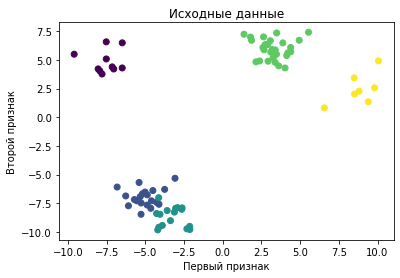

In [18]:
# визуализируем
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Исходные данные")
plt.xlabel('Первый признак')
plt.ylabel('Второй признак')

Text(0, 0.5, 'Второй признак')

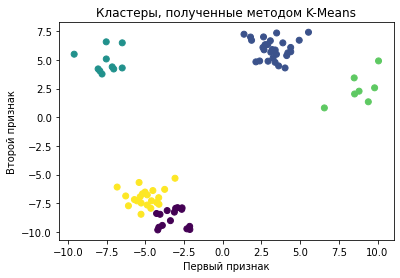

In [33]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.title("Кластеры, полученные методом K-Means")
plt.xlabel('Первый признак')
plt.ylabel('Второй признак')

Можно отметить, что алгоритм KMeans неплохо справился с задачей (почти все точки правильно кластеризованы).

Теперь для любой новой точки данных можно вычислить кластер, к которому она должна принадлежать: каждая новая точка назначается ближайшему кластеру

Размер новой точки данных: (2,)
Измененный размер: (1, 2)
Прогноз для новой точки:  [1]


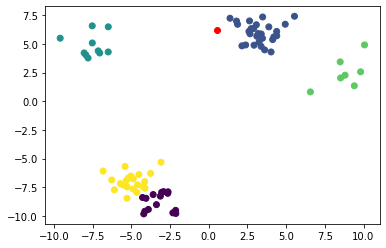

In [49]:
new_data_point = X[1, :] * 0.29 - 0.64 * X[2, :]
print(f'Размер новой точки данных: {new_data_point.shape}')
new_data_point = new_data_point.reshape(1, -1)
print(f'Измененный размер: {new_data_point.shape}')
predicted_cluster = kmeans.predict(new_data_point)
print('Прогноз для новой точки: ', predicted_cluster)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(new_data_point[:, 0], new_data_point[:, 1], c='r')

Проблема алгоритма k-means в том, что единственная информация, которую дает алгоритм - это то, что некоторая часть данных объединена в одну группу (в один кластер). При этом узнать **что это за кластер** возможности, как таковой, нет. Иными словами, кластеры лишь нумеруются, а вот их содержимое узнать можно лишь посмотрев самому. Пример: если изображения с котами объединены в один кластер, то чтобы узнать, что там именно *коты*, нужно посмотреть на содержимое этого кластера. Алгоритм лишь нумерует кластеры, а не придает им метки.

С другой стороны, есть возможность посмотреть на центры кластеров. Это может быть полезно в некоторых случаях.

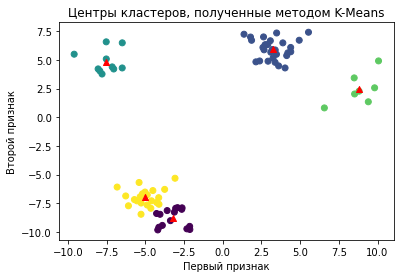

In [54]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.title("Центры кластеров, полученные методом K-Means")
plt.xlabel('Первый признак')
plt.ylabel('Второй признак')
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
           marker='', c = 'r')

**Проблемы алгоритма K-Means**  
1. Каждый кластер определяется его центром, поэтому кластеры имеют выпуклую форму (более сложные формы описать сложно)
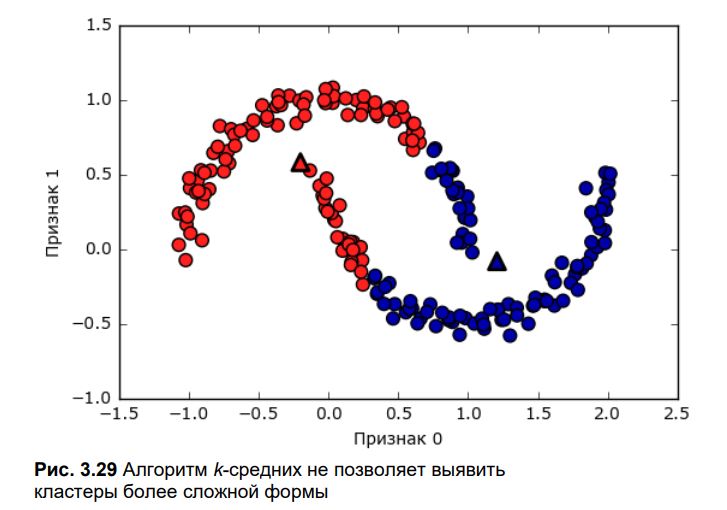
2. Алгоритм k-means проводит границу между кластерами так, чтобы оно была посередине между центрами кластеров. Это может привести к следующему:
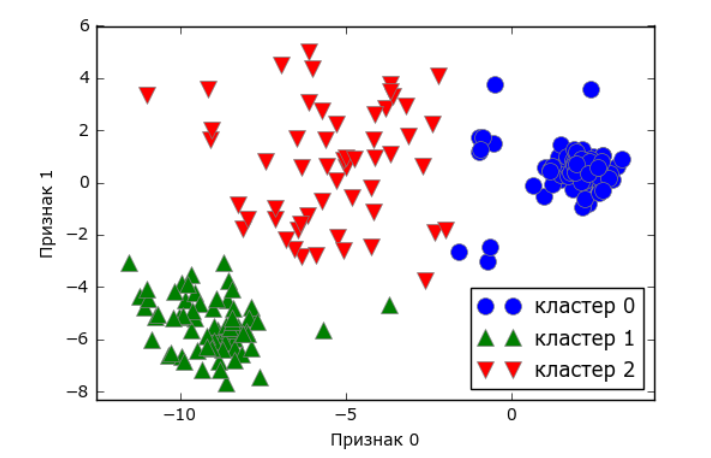
3. Не всегда известно точное число кластеров k

# Агломеративная кластеризация
Agglomerative clustering - 